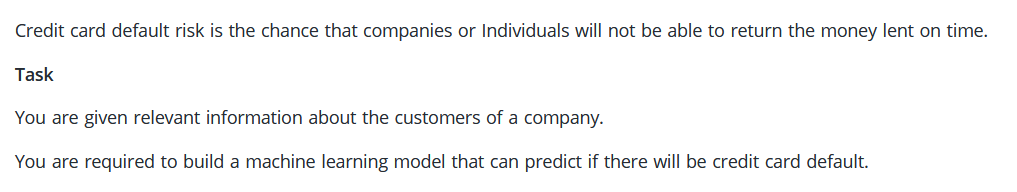

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#importing CSV file
credit = pd.read_csv("train.csv")
#Renaming "credit_limit_used(%)" as "credit_limit_used" 
#because special characters can't be used in data frame column name.
credit.rename(columns = {'credit_limit_used(%)':'credit_limit_used'}, inplace = True)
credit.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [171]:
#info method gives us the information of data frame
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used     

# Data Cleaning

In [174]:
# "owns_car" has 547 empty values as it is a categorical variable i am mapping "Y" as 1 and "N" as 0 to fill the empty values
credit['owns_car'] = credit['owns_car'].map({'Y':1, 'N':0})

In [175]:
credit

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,0.0,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,0.0,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,0.0,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,0.0,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,1.0,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,0.0,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,0.0,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,0.0,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,1.0,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


owns_car, no_of_children, total_family_members, migrant_worker, yearly_debt_payments  - categorical
net_yearly_income, no_of_days_employed, credit_score -> Numerical

In [176]:
##Looping through each column of categorical df and checking if there are any null values. 
#If yes, replacing NAN value with the mode(most occuring class in the data set ) of the column
categorical = ['owns_car', 'no_of_children', 'total_family_members', 'migrant_worker', 'yearly_debt_payments']
for column in range(0, len(categorical)):
    if(credit[categorical[column]].isnull().values.any()):
        credit[categorical[column]] = credit[categorical[column]].fillna(credit[categorical[column]].mode())

In [177]:
#Looping through each column of credit df and checking if there are any null values. 
#If yes, replacing NAN value with the median(works well even if there are outliers) of the column.
numerical = ['net_yearly_income', 'no_of_days_employed', 'credit_score']
for column in credit:
    if(credit[column].isnull().values.any()):
        credit[column] = credit[column].fillna(credit[column].median())

In [178]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  float64
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45528 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used     

In [179]:
#Mapping owns_car to it's original values 
credit['owns_car'] = credit['owns_car'].map({1:'Y', 0:'N'})

# Data Visualisation

In [180]:
default = credit[credit.credit_card_default == 1]
default.shape

(3697, 19)

In [181]:
nodefault = credit[credit.credit_card_default == 0]
nodefault.shape

(41831, 19)

In [182]:
#grouping by the feature "credit_card_default" and calculating the mean.
credit.groupby('credit_card_default').mean()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months
credit_card_default,,,,,,,,,,,,
0,38.996199,0.408525,198366.553660,68869.541632,2.154885,0.174894,31858.376401,43006.600458,49.382372,799.035667,0.000000,0.000000
1,38.961861,0.469840,226556.089692,45161.086827,2.190695,0.222613,31032.333922,49678.977869,84.512307,598.995131,0.747633,0.622397


<AxesSubplot:xlabel='owns_car'>

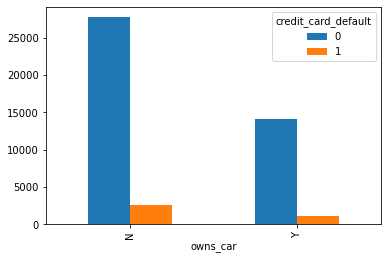

In [183]:
pd.crosstab(credit.owns_car, credit.credit_card_default).plot(kind = 'bar')

<AxesSubplot:xlabel='owns_house'>

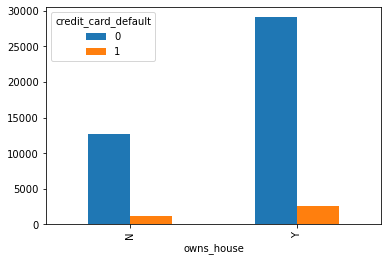

In [184]:
pd.crosstab(credit.owns_house, credit.credit_card_default).plot(kind = 'bar')

<AxesSubplot:xlabel='gender'>

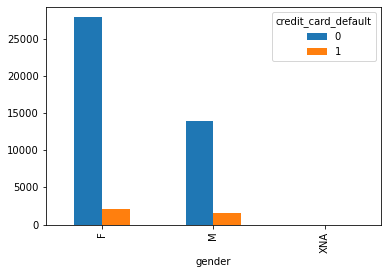

In [185]:
pd.crosstab(credit.gender, credit.credit_card_default).plot(kind = 'bar')

In [186]:
credit

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [187]:
# Checking if there are any duplicate values
credit.customer_id.duplicated().sum()

0

In [188]:
credit.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,N,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [189]:
credit.shape

(45528, 19)

# Feature Selection

In [190]:
# Using chi2 for feature selection, This applies to find the relation between categorical and categorical.
from sklearn.feature_selection import chi2

One Hot Encoding

In [191]:
#Tying with one hot encoding but this method is not much useful as it's adding too many features to the df
occupation_type_convert = pd.get_dummies(credit, prefix=['occupation'], columns = ['occupation_type'])
occupation_type_convert

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,...,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,4.0,...,0,0,0,0,0,0,0,0,1,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,2.0,...,0,0,0,0,0,0,0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,2.0,...,0,0,0,0,0,0,0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,2.0,...,0,0,0,0,0,0,0,0,0,0


Label Encoding

In [192]:
#In this encoding, each category is assigned a value from 1 through N. 
#(where N is the number of categories for the feature.
from sklearn.preprocessing import LabelEncoder

In [193]:
# Encoding categorical variables.
credit['occupation_type_encode'] = LabelEncoder().fit_transform(credit.occupation_type) 
credit['gender_enocde'] = LabelEncoder().fit_transform(credit.gender)
credit['owns_house_enocde'] = LabelEncoder().fit_transform(credit.owns_house)
credit['owns_car_enocde'] = LabelEncoder().fit_transform(credit.owns_car)
credit

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,...,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_type_encode,gender_enocde,owns_house_enocde,owns_car_enocde
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,...,18690.93,73,544.0,2,1,1,17,0,1,0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,...,37745.19,52,857.0,0,0,0,8,1,1,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,...,41598.36,43,650.0,0,0,0,8,1,1,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,...,32627.76,20,754.0,0,0,0,3,0,1,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,...,52950.64,75,927.0,0,0,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,...,29663.83,82,907.0,0,0,0,17,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,...,139947.16,32,679.0,0,0,0,0,0,1,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,...,83961.83,46,727.0,0,0,0,3,0,1,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,...,25538.72,92,805.0,0,0,0,8,1,0,1


In [194]:
#Dropping numerical features and also "customer_id" "name" as they are not required for training.
X = credit.drop(['customer_id','name','age', 'yearly_debt_payments', 'gender','owns_car','owns_house','net_yearly_income','no_of_days_employed','occupation_type', 'credit_limit', 'credit_limit_used', 'credit_score', 'credit_card_default'], axis=1)

In [195]:
print(X)

       no_of_children  total_family_members  migrant_worker  prev_defaults  \
0                 0.0                   1.0             1.0              2   
1                 0.0                   2.0             0.0              0   
2                 0.0                   2.0             0.0              0   
3                 0.0                   2.0             0.0              0   
4                 0.0                   1.0             0.0              0   
...               ...                   ...             ...            ...   
45523             2.0                   4.0             0.0              0   
45524             0.0                   2.0             1.0              0   
45525             0.0                   2.0             0.0              0   
45526             0.0                   2.0             0.0              0   
45527             1.0                   3.0             0.0              0   

       default_in_last_6months  occupation_type_encode  gender_

In [196]:
#Traget Variable
Y = credit['credit_card_default']

In [197]:
print(Y)

0        1
1        0
2        0
3        0
4        0
        ..
45523    0
45524    0
45525    0
45526    0
45527    0
Name: credit_card_default, Length: 45528, dtype: int64


In [198]:
chi_scores = chi2(X,Y)

In [199]:
#Array 1 represents chiscores and Array 2 represents P values
chi_scores

(array([3.08838954e+01, 2.01868519e+00, 4.32667305e+01, 3.12742451e+04,
        2.60354696e+04, 6.12315399e+01, 9.92135829e+01, 1.00696780e-01,
        8.86076464e+00]),
 array([2.73935569e-08, 1.55373626e-01, 4.77636149e-11, 0.00000000e+00,
        0.00000000e+00, 5.07421070e-15, 2.26686949e-23, 7.50995068e-01,
        2.91365497e-03]))

In [200]:

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

owns_house_enocde          7.509951e-01
total_family_members       1.553736e-01
owns_car_enocde            2.913655e-03
no_of_children             2.739356e-08
migrant_worker             4.776361e-11
occupation_type_encode     5.074211e-15
gender_enocde              2.266869e-23
default_in_last_6months    0.000000e+00
prev_defaults              0.000000e+00
dtype: float64

<AxesSubplot:>

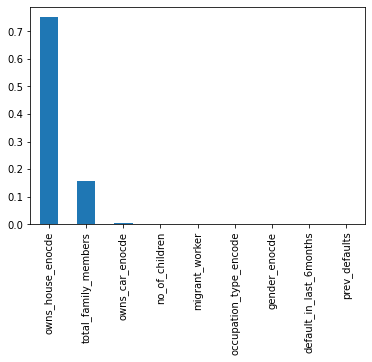

In [201]:
p_values.plot.bar()

In [202]:
credit

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,...,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_type_encode,gender_enocde,owns_house_enocde,owns_car_enocde
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,...,18690.93,73,544.0,2,1,1,17,0,1,0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,...,37745.19,52,857.0,0,0,0,8,1,1,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,...,41598.36,43,650.0,0,0,0,8,1,1,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,...,32627.76,20,754.0,0,0,0,3,0,1,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,...,52950.64,75,927.0,0,0,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,...,29663.83,82,907.0,0,0,0,17,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,...,139947.16,32,679.0,0,0,0,0,0,1,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,...,83961.83,46,727.0,0,0,0,3,0,1,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,...,25538.72,92,805.0,0,0,0,8,1,0,1


In [203]:
#dropping owns_house_encode and total_family_members as they have highest P value. 
credit.drop(['customer_id','name','owns_house','owns_house_enocde','total_family_members','occupation_type','gender','owns_car'],axis=1,inplace = True)
credit

,age,no_of_children,net_yearly_income,no_of_days_employed,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_type_encode,gender_enocde,owns_car_enocde
0,46,0.0,107934.04,612.0,1.0,33070.28,18690.93,73,544.0,2,1,1,17,0,0
1,29,0.0,109862.62,2771.0,0.0,15329.53,37745.19,52,857.0,0,0,0,8,1,0
2,37,0.0,230153.17,204.0,0.0,48416.60,41598.36,43,650.0,0,0,0,8,1,0
3,39,0.0,122325.82,11941.0,0.0,22574.36,32627.76,20,754.0,0,0,0,3,0,0
4,46,0.0,387286.00,1459.0,0.0,38282.95,52950.64,75,927.0,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,2.0,96207.57,117.0,0.0,11229.54,29663.83,82,907.0,0,0,0,17,0,0
45524,31,0.0,383476.74,966.0,1.0,43369.91,139947.16,32,679.0,0,0,0,0,0,0
45525,27,0.0,260052.18,1420.0,0.0,22707.51,83961.83,46,727.0,0,0,0,3,0,0
45526,32,0.0,157363.04,2457.0,0.0,20150.10,25538.72,92,805.0,0,0,0,8,1,1



 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  float64
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45528 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)     45528 non-null  int64  
 15  credit_score             45528 non-null  float64
 16  prev_defaults            45528 non-null  int64  
 17  default_in_last_6months  45528 non-null  int64  
 18  credit_card_default      45528 non-null  int64  

In [204]:
##Performing Anova test between each numerical variable and target variable
from statsmodels.formula.api import ols
import statsmodels.api as sm
mod = ols('credit_card_default ~ age+net_yearly_income+no_of_days_employed+yearly_debt_payments+credit_limit+credit_limit_used+credit_score',data = credit).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age,0.001544,1.0,0.031892,8.582666e-01
net_yearly_income,0.098704,1.0,2.038780,1.533394e-01
no_of_days_employed,2.202493,1.0,45.493782,1.549501e-11
yearly_debt_payments,0.451447,1.0,9.324899,2.261913e-03
credit_limit,0.128032,1.0,2.644577,1.039107e-01
credit_limit_used,187.719607,1.0,3877.457561,0.000000e+00
credit_score,823.709349,1.0,17014.195232,0.000000e+00
Residual,2203.762745,45520.0,NaN,NaN


In [205]:
#If PR value is greater than significance value i.e 0.05, drop the column   
credit.drop(aov_table[aov_table['PR(>F)'] > 0.05].index, axis=1, inplace = True)
credit.columns

Index(['no_of_children', 'no_of_days_employed', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit_used', 'credit_score',
       'prev_defaults', 'default_in_last_6months', 'credit_card_default',
       'occupation_type_encode', 'gender_enocde', 'owns_car_enocde'],
      dtype='object')

In [206]:
credit

,no_of_children,no_of_days_employed,migrant_worker,yearly_debt_payments,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_type_encode,gender_enocde,owns_car_enocde
0,0.0,612.0,1.0,33070.28,73,544.0,2,1,1,17,0,0
1,0.0,2771.0,0.0,15329.53,52,857.0,0,0,0,8,1,0
2,0.0,204.0,0.0,48416.60,43,650.0,0,0,0,8,1,0
3,0.0,11941.0,0.0,22574.36,20,754.0,0,0,0,3,0,0
4,0.0,1459.0,0.0,38282.95,75,927.0,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45523,2.0,117.0,0.0,11229.54,82,907.0,0,0,0,17,0,0
45524,0.0,966.0,1.0,43369.91,32,679.0,0,0,0,0,0,0
45525,0.0,1420.0,0.0,22707.51,46,727.0,0,0,0,3,0,0
45526,0.0,2457.0,0.0,20150.10,92,805.0,0,0,0,8,1,1


In [207]:
# X is the independent features for classifying the target variable
X = credit.drop('credit_card_default', axis=1)
X

,no_of_children,no_of_days_employed,migrant_worker,yearly_debt_payments,credit_limit_used,credit_score,prev_defaults,default_in_last_6months,occupation_type_encode,gender_enocde,owns_car_enocde
0,0.0,612.0,1.0,33070.28,73,544.0,2,1,17,0,0
1,0.0,2771.0,0.0,15329.53,52,857.0,0,0,8,1,0
2,0.0,204.0,0.0,48416.60,43,650.0,0,0,8,1,0
3,0.0,11941.0,0.0,22574.36,20,754.0,0,0,3,0,0
4,0.0,1459.0,0.0,38282.95,75,927.0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
45523,2.0,117.0,0.0,11229.54,82,907.0,0,0,17,0,0
45524,0.0,966.0,1.0,43369.91,32,679.0,0,0,0,0,0
45525,0.0,1420.0,0.0,22707.51,46,727.0,0,0,3,0,0
45526,0.0,2457.0,0.0,20150.10,92,805.0,0,0,8,1,1


In [208]:
#Y is the target variable
Y = credit['credit_card_default']
Y

0        1
1        0
2        0
3        0
4        0
        ..
45523    0
45524    0
45525    0
45526    0
45527    0
Name: credit_card_default, Length: 45528, dtype: int64

In [209]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        X, Y, test_size = 0.25, random_state = 0)

In [210]:
#Applying Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [211]:
#Prediction using xtest
y_pred = classifier.predict(xtest)

# Model Evaluation

In [212]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[10284   191]
 [  318   589]]


In [213]:
#checking accurancy
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9552802670883852
